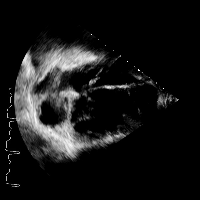

In [48]:
import nibabel as nib
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from IPython.display import clear_output
import time

# Load NIfTI file
img = nib.load('/content/patient-12-4_image.nii')
data = img.get_fdata()

# Normalize to 0–255 for display
data_normalized = ((data - data.min()) * (255.0 / (data.max() - data.min()))).astype(np.uint8)

# Resize dimensions
resize_width = 200
resize_height = 200

# Loop through slices
for i in range(data.shape[2]):
    frame = data_normalized[:, :, i]
    frame_resized = cv2.resize(frame, (resize_width, resize_height))  # Resize frame
    cv2_imshow(frame_resized)  # Show resized frame
    time.sleep(0.05)  # Pause for 50 ms
    clear_output(wait=True)  # Clear previous frame (simulate animation)


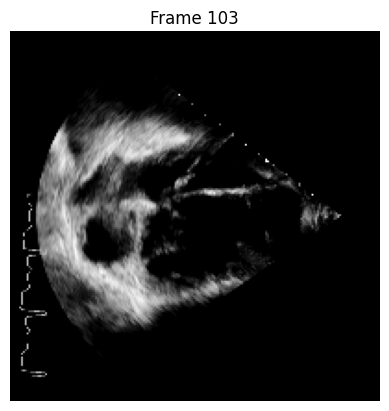

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [54]:
import nibabel as nib
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import cv2
from google.colab import files



# Load the NIfTI file
nii_img = nib.load('/content/patient-12-4_image.nii')
data = nii_img.get_fdata()


# Create animation
fig = plt.figure()

def update(frame):
    plt.clf()
    frame_resized = cv2.resize(data[:,:,frame], (200, 200))
    plt.imshow(frame_resized, cmap='gray')
    plt.axis('off')
    plt.title(f'Frame {frame}')

# Create animation
anim = FuncAnimation(fig, update, frames=data.shape[2],
                    interval=100)  # 100ms between frames
anim.save('animation.gif', writer='Pillow')
plt.show()

files.download(gif_path)
